In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, ConfusionMatrixDisplay


In [49]:
# MODEL_NAME = 'Llama3-3'
# MODEL_NAME = 'Llama2'
# MODEL_NAME = 'Mistral'

BASE = '../../../../03_datasets/sentiment-analysis_stories/annotations/final'

MODEL = {
    'Llama3-3': f'{BASE}/25-05-09_Annotations_Llama3-3.json',
    'Llama2': f'{BASE}/25-05-09_Annotations_Llama2.json',
    'Mistral': f'{BASE}/25-05-09_Annotations_Mistral.json'
}


BASE_IMAGE = '../../../../03_datasets/animals/annotations/final'
IMAGE_MODEL = {
    'Stable Diffusion 3.5': f'{BASE_IMAGE}/25-05-09_Stable-Diffusion-3.5_animal_match.json',
    'Stable Cascade': f'{BASE_IMAGE}/25-06-10_Stable-Cascade_animal_match.json',
    'FLUX.1-dev': f'{BASE_IMAGE}/25-05-09_FLUX.1-dev_animal_match.json'
}




In [3]:
def extract_sentiment(input):
    m = re.search('The story should have a (.+?) sentiment', input)
    if m:
        found = m.group(1)
        return found

    return input

/var/folders/d_/r89f0qt56b91xr3wj5bwft480000gr/T/ipykernel_98859/2710012571.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.88, 1])  # Avoid overlapping with colorbar


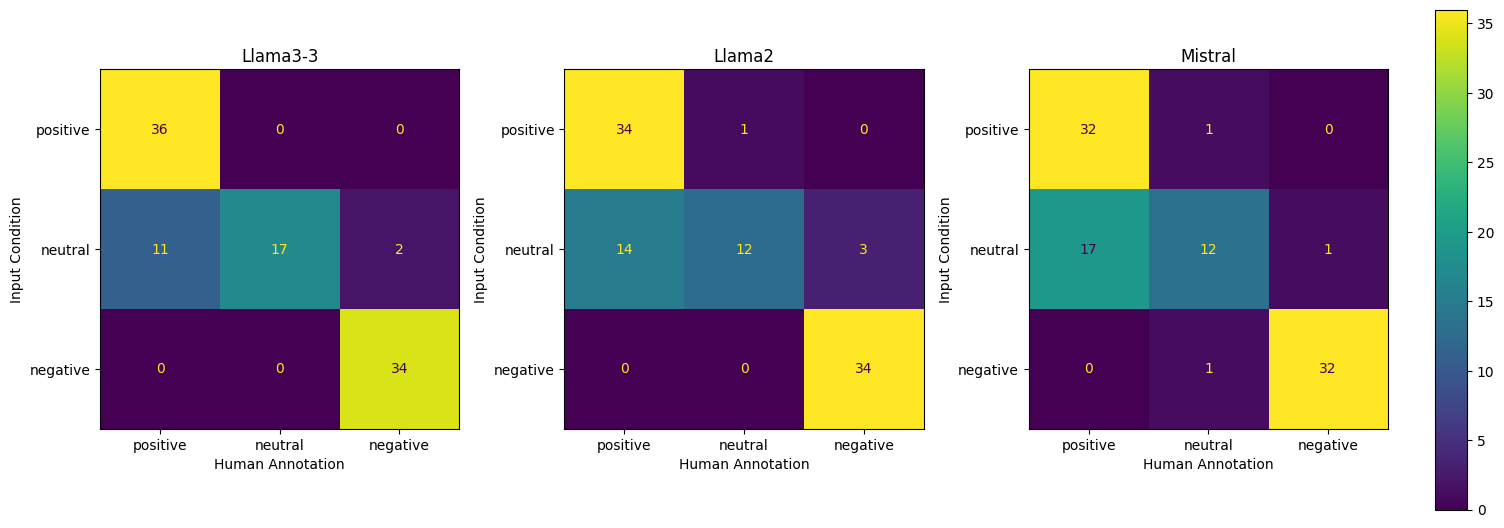

In [ ]:
fig = plt.figure(figsize=(16, 5))

colorbar_image = None
i = 1
for id, path in MODEL.items():
    df = pd.read_json(path)
    df = df.loc[~df['oracle'].isna()]
    df['condition'] = df['input'].apply(extract_sentiment)
    
    conditions = df['condition'].to_list()
    oracle = df['oracle'].to_list()

    cm = confusion_matrix(conditions, oracle, labels=['positive', 'neutral', 'negative'])
    ax = fig.add_subplot(1, 3, i)
    cmd = ConfusionMatrixDisplay.from_predictions(conditions, oracle, colorbar=False, ax=ax, labels=['positive', 'neutral', 'negative'])

    cmd.ax_.set_title(f'{id}')
    cmd.ax_.set_xlabel(f'Human Annotation')
    cmd.ax_.set_ylabel(f'Input Condition')
    i += 1

    if colorbar_image is None:
        colorbar_image = cmd.im_
    
fig.subplots_adjust(right=0.88)  # Leave space on right for colorbar
cbar_ax = fig.add_axes([0.9, 0, 0.02, 1])  # [left, bottom, width, height]
fig.colorbar(colorbar_image, cax=cbar_ax)

plt.tight_layout(rect=[0, 0, 0.88, 1])  # Avoid overlapping with colorbar
plt.show()